# Tutorial to Work with a JPSS (Polar-Orbiting) VIIRS Level 3 (Gridded) Aerosol Data File

This tutorial was written in December 2022 by Dr. Amy Huff, IMSG at NOAA/NESDIS/STAR (amy.huff@noaa.gov) and Dr. Rebekah Esmaili, STC at NOAA/JPSS (rebekah.esmaili@noaa.gov). It demonstrates how to work with a VIIRS Level 3 (gridded) netCDF4 file, including what aspects to consider for making a beautiful image of gridded global data.

The main steps are:
- Open the file
- Read the global file metadata & the metadata for variables in the file
- Understand the data variables (e.g., units, valid range, data type)
- Visualize gridded satellite data on a map using the appropriate:
    - Colormap
    - Data range
    - Map projection
- Format settings to make a beautiful image:
    - Color bar
    - Coastlines/borders
    - Land/ocean shading
    - Latitude/longitude ticks & gridlines
    - Figure title
- Save image file

## Import Python packages

We will use four Python packages (libraries) and two Python modules in this tutorial:
- The **xarray** library is used to work with labelled multi-dimensional arrays
- The **NumPy** library is used to perform array operations
- The **Matplotlib** library is used to make plots
- The **Cartopy** library is used to create maps
- The **datetime** module is used to manipulate dates and times
- The **pathlib** module is used to set filesystem paths for the user's operating system

In [13]:
import xarray as xr

import numpy as np

import matplotlib as mpl
from matplotlib import pyplot as plt

from cartopy import crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

import datetime

from pathlib import Path

## Set directory path for satellite data files

We set the directory path for the satellite data files using the **pathlib** module, which automatically uses the correct format for the user's operating system. This helps avoid errors in situations when more than one person is using the same code file, because Windows uses back slashes in directory paths, while MacOS and Linux use forward slashes. 

More information about the **pathlib** module: https://docs.python.org/3/library/pathlib.html#module-pathlib

To keep things simple for this training, we put the satellite data files we downloaded in the current working directory ("cwd"), i.e., the same Jupyter Notebook folder where this code file is located.

In [14]:
directory_path = Path.cwd()

## Topic 3: Understanding the Structure & Contents of netCDF Data Files

### Step 3.1: Open a VIIRS AOD satellite data file using xarray & read metadata

Let's use **xarray** to open the VIIRS L3 AOD data file we downloaded ("file_name"). We set the full path for the data file ("file_id") using **pathlib** syntax.

We open the satellite data file using "xarray.open_dataset" and then print the file metadata. The contents of a satellite data file are called a "Dataset" in **xarray**, conventionally abbreviated as "ds". 

The global file metadata are listed under "Attributes".

For any of the "Data variables" or "Coordinates", click on the attributes icon to see array metadata and the data repository icon to see an array summary.

Longitude ("lon") and latitude ("lat") arrays are displayed under "Coordinates".

The satellite data in the file are displayed under "Data variables".  A data variable is called a "DataArray" in **xarray**, conventionally abbreviated as "da".

The data variables in this file are two-dimensional arrays with "Dimensions" of "lon" (3600 pixels) and "lat" (1800 pixels). We are going to focus on the "AOD550" variable, aerosol optical depth (AOD) at 550nm.

In [15]:
file_name = 'viirs_eps_npp_aod_0.100_deg_20220911.nc'
file_id = directory_path / file_name

ds = xr.open_dataset(file_id)
ds

<xarray.Dataset>
Dimensions:       (lon: 3600, lat: 1800)
Coordinates:
  * lon           (lon) float32 -179.9 -179.8 -179.8 ... 179.8 179.9 179.9
  * lat           (lat) float32 -89.95 -89.85 -89.75 ... 89.75 89.85 89.95
Data variables:
    AOD550        (lat, lon) float32 ...
    AE            (lat, lon) float32 ...
    AOD550_count  (lat, lon) uint16 ...
    AE_count      (lat, lon) uint16 ...
Attributes:
    dataset_name:        viirs_eps_npp_aod_0.100_deg_20220911.nc
    title:               NOAA Enterprise L3 Aerosol Optical Depth
    spatial_resolution:   0.10 degree
    processing_level:    National Oceanic and Atmospheric Administration (NOA...
    Conventions:         CF-1.6
    instrument_name:     VIIRS
    satellite_name:      Suomi NPP
    source:              VIIRS EPS high quality AOD

### Step 3.2: Open the AOD550 data array as a NumPy array & print summary of array

The AOD550 data array is large, so **xarray** does not include a summary of the array in the metadata, like it does for the lat and lon arrays. When working with a new satellite dataset, it's good practice to check the data array to see the data format and range of values. 

We can use the "xarray.DataArray.values" function to open the AOD550 data array as a **NumPy** array and print a summary of the array.

In [16]:
ds.AOD550.values

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

### Step 3.3: Print maximum and minimum  values in the AOD550 array, ignoring any NaNs, using NumPy

There are missing or invalid data at the beginning and end of the AOD550 array, which are displayed as "nan". To see the range of valid data in the array, we can use **NumPy** to print the non-NaN maximum and minimum values.  Note these values are floating point numbers (floats) and fall within the "valid_range" of the AOD550 data listed in the metadata.

In [17]:
print(np.nanmax(ds.AOD550.values))
print(np.nanmin(ds.AOD550.values))

4.9863234
-0.049990635


### Exercise Aerosol-1: OPEN THE *lat* AND *lon* DATA ARRAYS AS NumPy ARRAYS & PRINT SUMMARIES OF ARRAYS

In the following two code blocks, open the 1) **lat** and 2) **lon** data arrays as **NumPy** arrays and print a summary of each array. Compare the array summaries to those listed in the metadata.

You may notice some inconsistencies in the display of the floats in the lat and lon arrays. For more information on how Python displays floats, see: https://docs.python.org/3/tutorial/floatingpoint.html#tut-fp-issues

In [18]:
# OPEN "lat" DATA ARRAY & PRINT ARRAY SUMMARY


In [19]:
# OPEN "lon" DATA ARRAY & PRINT ARRAY SUMMARY


## Topic 4: Handling Data Arrays

There is no need to manipulate the data arrays in the VIIRS L3 AOD data file. VIIRS L2 AOD data files contain a quality flag variable ("QCAll") that indicates the confidence in the AOD retrieval ("high", "medium", "low" or "not retrieved"). When working with the L2 data, it is important to process AOD to select the appropriate data quality for your application. However, the VIIRS L3 files contain **only high quality** AOD data.

## Topic 5: Making Composite (RGB) Images 

This topic is not applicable for the VIIRS L3 AOD data file. We can only make RGB images from satellite data files that contain sensor band radiances or brightness temperature variables.

## Topic 6: Working with Map Projections

### Step 6.1: Make a quick plot of AOD550 using xarray

Now that we understand the structure and contents of the AOD550, lat, and lon data arrays, we can proceed to plot the data. 

When you're working with a new data product, it's good practice to make a quick plot to check the distribution of data in the file. We can do this using the plotting functions built into **xarray**.

Overview of **xarray** plotting functions: https://docs.xarray.dev/en/stable/user-guide/plotting.html

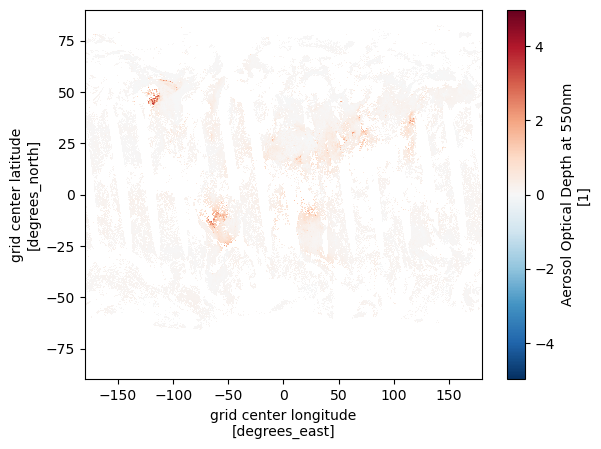

In [20]:
ds.AOD550.plot()

#### Step 6.1.1: Make a quick plot of AOD550 using xarray - Use a different colormap

The plot generated using the **xarray** default settings looks horrible. It's very difficult to interpret the AOD550 data because the default colormap is a "diverging" colormap, but we know from the metadata that the AOD550 valid range includes almost all positive values.  So let's change the colormap to a "sequential" colormap, used to represent information that has ordering.

**Xarray's** plotting functions are built on **Matplotlib**, so we use the built-in colormaps in **Matplotlib**.

List of **Matplotlib** colormaps: https://matplotlib.org/stable/tutorials/colors/colormaps.html

Note that adding "_r" to the end of any colormap name reverses it (e.g., "plasma_r")

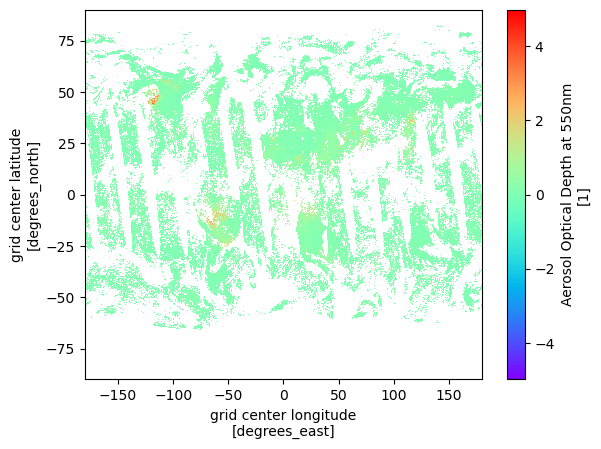

In [21]:
ds.AOD550.plot(cmap='rainbow')

#### Step 6.1.2: Make a quick plot of AOD550 using xarray - Change the plotted data range

Changing the colormap helps, but it's still difficult to discern any pattern in the plotted AOD550 data. We can see from the plotted data that most values fall in the range of 0 to 1 (green shading). We want to emphasize thick aerosols, AOD550 > 1. Also, the low end of the default data range extends to -5 but we know from the metadata that the low end of the AOD550 valid range is -0.05.

So let's set the plotted AOD550 data range as [-0.05, 1].

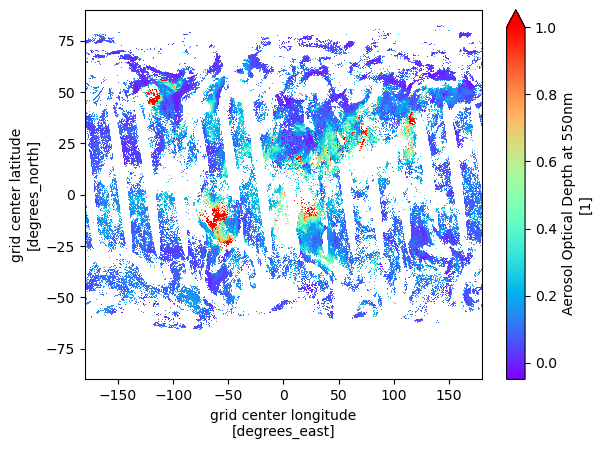

In [22]:
ds.AOD550.plot(cmap='rainbow', vmin=-0.05, vmax=1)

#### Step 6.1.3: Make a quick plot of AOD550 using xarray - Set unique color for data > vmax

That looks much better - now the pattern in the data is evident. However, we can't discern areas with AOD550 > 1 from those with AOD550 = 1 (they are the same color, red). To make it clear where the thickest aerosols are, we can set a unique color for data > vmax (e.g., AOD550 > 1) using **Matplotlib's** built-in colors.

List of Matplotlib colors: https://matplotlib.org/stable/gallery/color/named_colors.html

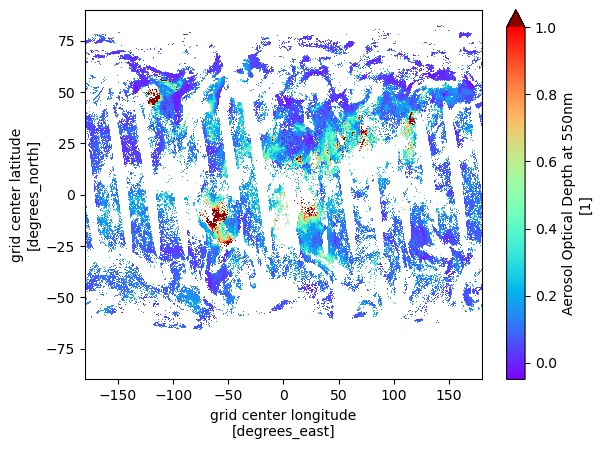

In [23]:
cmap = plt.get_cmap('rainbow').with_extremes(over='darkred')
ds.AOD550.plot(cmap=cmap, vmin=-0.05, vmax=1)

### Exercise Aerosol-2: SET YOUR OWN COLORMAP & COLOR FOR DATA > VMAX

In the code block below, fill in the missing "cmap" (colormap) and "over=" (color for AOD > 1) strings with your choices and generate the plot. Try a few different options to see the effects on the ease of readability/interpretation of the plotted data.

In [24]:
# SET YOUR OWN COLORMAP AND COLOR FOR DATA > VMAX

# cmap = plt.get_cmap('').with_extremes(over='')
# ds.AOD550.plot(cmap=cmap, vmin=-0.05, vmax=1)

### Step 6.2: Plot AOD550 on a map using Matplotlib & Cartopy - Select a map projection

Now that we have visually clear and informative data plotting settings, we can proceed to plotting the satellite data on a map. 

We will set the map projection for our plot using **Cartopy**.  

List of **Cartopy** map projections: https://scitools.org.uk/cartopy/docs/latest/reference/projections.html

There are many different map projection options, each with its own strengths and limitations. Choose a map projection that highlights/emphasizes the satellite data you are working with.  The VIIRS L3 gridded data is a global dataset, so we will focus on map projections that make it easy to see global data.

#### Step 6.2.1: Plot AOD550 on a map using Matplotlib & Cartopy - Plate Carree projection

We set up a figure in **Matplotlib** and add "geoaxes" with a map projection using **Cartopy**. 

The first example of a map projection is the **Plate Carree** equidistant cylindrical (equirectangular) projection: "plt.axes(projection=ccrs.PlateCarree())".

We plot the AOD550 data using **Matplotlib's** pyplot "pcolormesh" plotting function, with the colormap and color for data > vmax that we defined previously. Note **xarray** makes it easy to plot Data Arrays using "xarray.DataArray", e.g. "ds.lon", "ds.lat", "ds.AOD550".

**Matplotlib's** pyplot pcolormesh settings: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pcolormesh.html

The plotting function argument **"transform=ccrs.PlateCarree()"** tells **Cartopy** that the AOD550 data are in geographic coordinates (lat/lon). This argument **must** be included when plotting satellite data that are in geographic coordinates, or the data will not plot correctly on the map projection. Technically, it's not necessary if using the Plate Carree map projection ("projection=ccrs.PlateCarree()"), as we are in this example, but it's good practice to include the "transform" argument to avoid accidental errors when using a different map projection, which we will do in Steps 6.2.2 and 6.2.3.

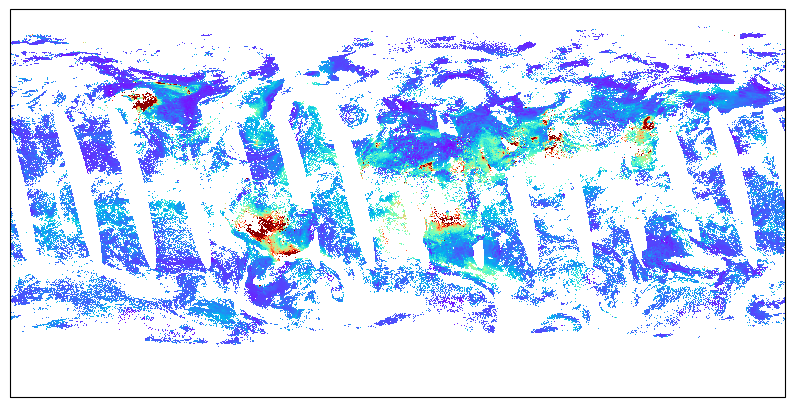

In [25]:
fig = plt.figure(figsize=(10, 10))

ax = plt.axes(projection=ccrs.PlateCarree())

cmap = plt.get_cmap('rainbow').with_extremes(over='darkred')

plot = ax.pcolormesh(ds.lon, ds.lat, ds.AOD550, cmap=cmap, vmin=-0.05, vmax=1, transform=ccrs.PlateCarree())

plt.show()

#### Step 6.2.2: Plot AOD550 on a map using Matplotlib & Cartopy - Mollweide projection

The next example of a map projection is the **Mollweide** pseudocylindrical equal area projection. 

The code is exactly the same as in Step 6.2.1, except the "plt.axes(projection=)" argument is set to "ccrs.Mollweide()" instead of "ccrs.PlateCarree()".

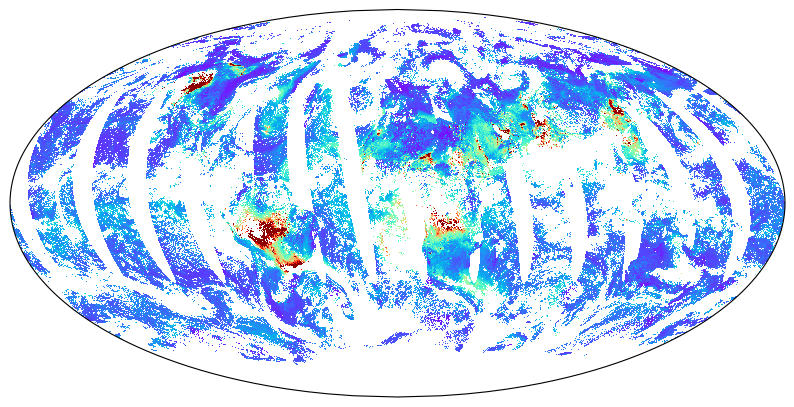

In [26]:
fig = plt.figure(figsize=(10, 10))

ax = plt.axes(projection=ccrs.Mollweide())

cmap = plt.get_cmap('rainbow').with_extremes(over='darkred')

plot = ax.pcolormesh(ds.lon, ds.lat, ds.AOD550, cmap=cmap, vmin=-0.05, vmax=1, transform=ccrs.PlateCarree())

plt.show()

#### Step 6.2.3: Plot AOD550 on a map using Matplotlib & Cartopy - Interrupted Goode Homolosine projection

The last example of a map projection uses the **Interrupted Goode Homolosine** composite equal area projection. 

The code is exactly the same as in Step 6.2.1, except the "plt.axes(projection=)" argument is set to "ccrs.InterruptedGoodeHomolosine()" instead of "ccrs.PlateCarree()".

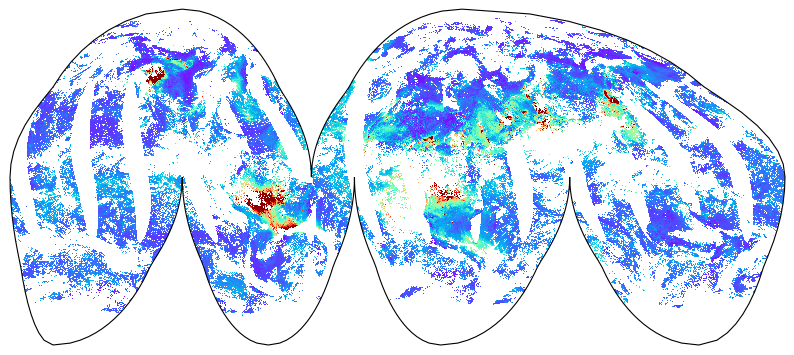

In [27]:
fig = plt.figure(figsize=(10, 10))

ax = plt.axes(projection=ccrs.InterruptedGoodeHomolosine())

cmap = plt.get_cmap('rainbow').with_extremes(over='darkred')

plot = ax.pcolormesh(ds.lon, ds.lat, ds.AOD550, cmap=cmap, vmin=-0.05, vmax=1, transform=ccrs.PlateCarree())

plt.show()

### Exercise Aerosol-3: SET YOUR OWN COLORMAP & COLOR FOR DATA > VMAX; SET YOUR OWN MAP PROJECTION

In the code block below, fill in the missing map projection in the "plt.axes(projection=)" argument. Then fill in the missing "cmap" (colormap) and "over=" (color for AOD > 1) strings with the choices you made in **Exercise Aerosol-2**, and generate the plot. Try a couple of different map projections to see how the choice of projection affects the display of the global aerosol data.

In [28]:
fig = plt.figure(figsize=(10, 10))

# SET MAP PROJECTION
ax = plt.axes(projection=)

# SET COLORMAP AND COLOR FOR DATA > VMAX
cmap = plt.get_cmap('').with_extremes(over='')

plot = ax.pcolormesh(ds.lon, ds.lat, ds.AOD550, cmap=cmap, vmin=-0.05, vmax=1, transform=ccrs.PlateCarree())

plt.show()

SyntaxError: invalid syntax (562327007.py, line 4)

### Step 6.3: Add a colorbar to the map of AOD550 using Matplotlib

You may have noticed that the colorbar for the AOD550 data, which appeared automatically when we used **xarray** to make a quick plot of the data in Step 6.1, is missing in our map figures made in Step 6.2. We need to add the colorbar manually using **Matplotlib**: "plt.colorbar(plot)".

In [ ]:
fig = plt.figure(figsize=(10, 10))

ax = plt.axes(projection=ccrs.Mollweide())

cmap = plt.get_cmap('rainbow').with_extremes(over='darkred')

plot = ax.pcolormesh(ds.lon, ds.lat, ds.AOD550, cmap=cmap, vmin=-0.05, vmax=1, transform=ccrs.PlateCarree())

plt.colorbar(plot)

plt.show()

#### Step 6.3.1: Add a colorbar to the map of AOD550  using Matplotlib - Change size & position of colorbar

The colorbar added with the default settings looks terrible; the colorbar is enormous compared to the map. Also, the Mollweide map projection lends itself to having a horizontal colorbar rather than a vertical one. 

So let's change the size and position of the colorbar using the **Matplotlib** "fig.colorbar()" function.

**Matplotlib's** fig.colorbar settings: https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure.colorbar

We can change the orientation of the colorbar to horizontal, set the fraction of original axes to use for the colorbar ("fraction=0.2"), set the fraction of padding between the colorbar and map axes ("pad=0.05"), and set the fraction of the size of the colorbar to the figure ("shrink=0.5"). 

In [ ]:
fig = plt.figure(figsize=(10, 10))

ax = plt.axes(projection=ccrs.Mollweide())

cmap = plt.get_cmap('rainbow').with_extremes(over='darkred')

plot = ax.pcolormesh(ds.lon, ds.lat, ds.AOD550, cmap=cmap, vmin=-0.05, vmax=1, transform=ccrs.PlateCarree())

cb = fig.colorbar(plot, orientation='horizontal', fraction=0.2, pad=0.05, shrink=0.5)

plt.show()

#### Step 6.3.2: Add a colorbar to the map of AOD550 using Matplotlib - Set tick marks/labels & add label for colorbar

That looks a lot better - the colorbar is now an appropriate size and in a logical position under the map. But the colorbar is missing a title (label). In addition, I think there are too many tick marks - the colorbar looks a bit busy. Finally, the colorbar is missing the little arrow on the end that indicates the color we selected for AOD550 > 1. 

Let's tweak the colorbar settings by adding more arguments in the "fig.colorbar()" function, to manually set the tick marks and show the little arrow on the end with the color we selected for data > vmax ("extend='max'"). We also add a  title for the colorbar ("set_label"), bolded and in 8-point font (using Matplotlib's text settings), and add labels for the tick marks ("set_xticklabels").

**Matplotlib** text settings: https://matplotlib.org/stable/tutorials/text/text_props.html

In [ ]:
fig = plt.figure(figsize=(10, 10))

ax = plt.axes(projection=ccrs.Mollweide())

cmap = plt.get_cmap('rainbow').with_extremes(over='darkred')

plot = ax.pcolormesh(ds.lon, ds.lat, ds.AOD550, cmap=cmap, vmin=-0.05, vmax=1, transform=ccrs.PlateCarree())

cb = fig.colorbar(plot, orientation='horizontal', fraction=0.2, pad=0.05, shrink=0.5, ticks=[0, 0.25, 0.5, 0.75, 1], extend='max')
cb.set_label(label='Aerosol Optical Depth at 550nm', size=8, weight='bold')
cb.ax.set_xticklabels(['0', '0.25', '0.50', '0.75', '1.0'])

plt.show()

### Step 6.4: Add coastlines/borders/shading to map using Cartopy

**Cartopy** has a number of options for adding coastlines and borders to a map. The simplest option is to use **Cartopy's** Feature interface, which defines seven common features at 1:110m (coarse) resolution. These coastlines/borders plot as black lines with linewidth=1 by default.

**Cartopy** Features interface: https://scitools.org.uk/cartopy/docs/latest/matplotlib/feature_interface.html

Let's make a plain map with a **Plate Carree** projection and add the simple coastlines, international borders, US state borders, and large lakes from the Features interface. We'll leave out the AOD550 data for now, to see the map clearly.

In [ ]:
fig = plt.figure(figsize=(10, 10))

ax = plt.axes(projection=ccrs.PlateCarree())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.STATES)

plt.show()

#### Step 6.4.1: Add coastlines/borders/shading to map using Cartopy - Shade land/ocean & change border linewidths

Depending on the satellite data you are working with, the simple black & white default Features interface settings may be sufficient. But typically, you will want to shade the land and ocean to provide contrast. Also, the coastlines/borders lines are somewhat thick.

Let's modify the default Features interface settings to make the coastlines and borders lines narrower, and to color the ocean "lightblue" and the land "wheat".

List of **Matplotlib** colors: https://matplotlib.org/stable/gallery/color/named_colors.html

In [ ]:
fig = plt.figure(figsize=(10, 10))

ax = plt.axes(projection=ccrs.PlateCarree())

ax.add_feature(cfeature.COASTLINE, lw=0.5)
ax.add_feature(cfeature.BORDERS, lw=0.5)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.STATES, lw=0.25)
ax.add_feature(cfeature.LAND, color='wheat')
ax.add_feature(cfeature.OCEAN, color='lightblue')

plt.show()

#### Step 6.4.2: Add coastlines/borders/shading to map using Cartopy - Change resolution of coastlines & borders

If you are making a map of global data, then the Features interface has suitable resolution (1:110m). But if your map zooms into a continent, region, or city, then you will want to use higher resolution coastlines and borders.

**Cartopy's** Natural Earth shapefiles interface allows you to add coastlines and borders with much more control and higher resolution than the simple Features interface. Shapefiles are available at 1:10m high resolution (scale='10m'), 1:50m medium resolution (scale='50m'), and 1:110m coarse resolution (scale='110m').

Natural Earth shapefiles: https://www.naturalearthdata.com/downloads/

In this example, we zoom into North America using "set_extent([map_corners])" where the "map_corners" are the [western_longitude, eastern_longitude, southern_latitude, northern_latitude] of the zoomed-in map in degrees (use negative values to indicate °S latitude or °W longitude). As we saw in the plotting function in Step 7, we need to add the argument "crs=ccrs.PlateCarree()" to the "set_extent" function because we are entering the map_corners in geographic coordinates (latitude and longitude). 

Then we add Natural Earth features at 1:50m (medium) resolution: coastlines, country borders, and state borders as black lines, lakes and ocean shaded "lightblue", and land shaded "wheat".

We need to add the "zorder" argument to the Natural Earth feature function so the coastlines, borders, and shading plot in the proper order. Layers with larger zorder plot over layers with smaller zorder; the default zorder=1.5.

In [ ]:
fig = plt.figure(figsize=(10, 10))

ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent([-130, -60, 20, 60], crs=ccrs.PlateCarree())

ax.coastlines(resolution='50m', lw=0.25, zorder=2)
ax.add_feature(cfeature.NaturalEarthFeature(category='cultural', name='admin_0_countries', scale='50m'), lw=0.25, facecolor='none', edgecolor='black', zorder=2)
ax.add_feature(cfeature.NaturalEarthFeature(category='physical', name='lakes', scale='50m'), facecolor='lightblue', edgecolor='none', zorder=2)
ax.add_feature(cfeature.NaturalEarthFeature(category='cultural', name='admin_1_states_provinces', scale='50m'), lw=0.25, facecolor='none', edgecolor='black', zorder=2)
ax.add_feature(cfeature.NaturalEarthFeature(category='physical', name='ocean', scale='50m'), facecolor='lightblue')
ax.add_feature(cfeature.NaturalEarthFeature(category='physical', name='land', scale='50m'), facecolor='wheat')

plt.show()

#### Step 6.4.3: Add coastlines/borders/shading to global map of AOD550

Now that we understand the various **Cartopy** settings for adding coastlines, borders, and land/ocean shading to maps, we can format our map of satellite data. 

For the global map of AOD550, the simple **Cartopy** Features interface settings are sufficient, with modification to make the linewidths narrower. I added the "zorder=3" argument to the coastline, borders, and states features so the boundary lines plot on top of the AOD550 data.

To avoid competing with the "rainbow" colormap I have chosen for AOD550, I am shading lakes and ocean "lightgrey" and land "grey". These neutral colors will provide contrast against the plotted data, making it easy to interpret AOD550.

In [ ]:
fig = plt.figure(figsize=(10, 10))

ax = plt.axes(projection=ccrs.Mollweide())

ax.add_feature(cfeature.COASTLINE, lw=0.75, zorder=3)
ax.add_feature(cfeature.BORDERS, lw=0.75, zorder=3)
ax.add_feature(cfeature.LAKES, color='lightgrey')
ax.add_feature(cfeature.STATES, lw=0.5, zorder=3)
ax.add_feature(cfeature.LAND, color='grey')
ax.add_feature(cfeature.OCEAN, color='lightgrey')

cmap = plt.get_cmap('rainbow').with_extremes(over='darkred')

plot = ax.pcolormesh(ds.lon, ds.lat, ds.AOD550, cmap=cmap, vmin=-0.05, vmax=1, transform=ccrs.PlateCarree(), zorder=2)

cb = fig.colorbar(plot, orientation='horizontal', fraction=0.2, pad=0.05, shrink=0.5, ticks=[0, 0.25, 0.5, 0.75, 1], extend='max')
cb.set_label(label='Aerosol Optical Depth at 550nm', size=8, weight='bold')
cb.ax.set_xticklabels(['0', '0.25', '0.50', '0.75', '1.0'])

plt.show()

### Step 6.5: Add latitude/longitude gridlines & labels using Cartopy

Depending on the audience for your map figure, you may want to add a latitude/longitude grid. Latitude and longitude gridlines and labels can be added using **Cartopy's** "gridlines" function, conventionally abbreviated as "gl".

**Cartopy** gridlines settings: https://scitools.org.uk/cartopy/docs/latest/reference/generated/cartopy.mpl.geoaxes.GeoAxes.html#cartopy.mpl.geoaxes.GeoAxes.gridlines

**Cartopy** gridlines tutorial: https://scitools.org.uk/cartopy/docs/latest/matplotlib/gridliner.html

The appearance of gridlines and labels will be different for different map projections. The best approach is to begin with the default settings to add gridlines and labels: "gl=ax.gridlines(draw_labels=True)". The "LatitudeFormatter" and "LongitudeFormatter" format the grid labels. We'll leave out the AOD550 data for now, to see the map clearly.

In [ ]:
fig = plt.figure(figsize=(10, 10))

ax = plt.axes(projection=ccrs.PlateCarree())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.STATES)

gl=ax.gridlines(draw_labels=True)
gl.xformatter=LongitudeFormatter()
gl.yformatter=LatitudeFormatter()

plt.show()

#### Step 6.5.1: Add latitude/longitude gridlines & labels using Cartopy - Customized settings

The default gridlines settings are ok, but the labels are relatively large, and having labels on all four sides of the map is distracting. There are many parameters in the "gridlines" function that we can use to customize the grid labels and the gridlines themselves.

Let's make the gridlines narrower ("lw=0.25") and change the color and linestyle of the gridlines. Also, let's remove the labels along the top and right sides of map, add a little padding between the labels and the edge of the map, and make the labels smaller (8-point font).

In [ ]:
fig = plt.figure(figsize=(10, 10))

ax = plt.axes(projection=ccrs.PlateCarree())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.STATES)

gl=ax.gridlines(draw_labels=True, lw=0.25, color='magenta', linestyle='-.')
gl.xformatter=LongitudeFormatter()
gl.yformatter=LatitudeFormatter()
gl.right_labels=None
gl.top_labels=None
gl.ypadding=5
gl.xpadding=5
gl.xlabel_style={'size': 8}
gl.ylabel_style={'size': 8}

plt.show()

### Exercise Aerosol-4: SET YOUR OWN MAP PROJECTION & GRIDLINES FORMATTING

In the code block below, fill in the missing map projection in the "plt.axes(projection=)" argument. Then modify the "gridlines" settings so the gridlines and labels are clear and easy to read for your chosen map projection.

Play around with the gridlines/labels settings: try changing the color, width, and type of gridlines & the color, size, and formatting of the grid labels.

In [ ]:
fig = plt.figure(figsize=(10, 10))

# SET MAP PROJECTION
ax = plt.axes(projection=)

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.STATES)

# SET FORMATTING FOR LATITUDE/LONGITUDE GRIDLINES & LABELS
gl=ax.gridlines(draw_labels=True)
gl.xformatter=LongitudeFormatter()
gl.yformatter=LatitudeFormatter()

plt.show()

#### Step 6.5.2: Add latitude/longitude gridlines & labels to global map of AOD550

Now that we understand how to add and format gridlines and labels, we can add them to our global map of satellite data.

Remember, depending on the audience for your map of satellite data, gridlines and labels may or may not be appropriate. For example, a figure for a webpage or slideshow presentation probably doesn't need the detail of grid labels, and may not need gridlines. But you would likely want to include gridlines and labels on a figure for a research paper or report.

For my global map of AOD550 on the Mollweide projection using the "rainbow" colormap, I'm changing the color of the gridlines to "silver", so they will have contrast against the plotted AOD500 data but won't be distracting. I also need to increase the padding of the latitude labels ("gl.ypadding=20") so they all plot. And I changed the color of the longitude labels to white because when I saved the figure as an image file in Step 6.7, the black labels were hard to see against the AOD550 data.

In [ ]:
fig = plt.figure(figsize=(10, 10))

ax = plt.axes(projection=ccrs.Mollweide())

ax.add_feature(cfeature.COASTLINE, lw=0.75, zorder=3)
ax.add_feature(cfeature.BORDERS, lw=0.75, zorder=3)
ax.add_feature(cfeature.LAKES, color='lightgrey')
ax.add_feature(cfeature.STATES, lw=0.5, zorder=3)
ax.add_feature(cfeature.LAND, color='grey')
ax.add_feature(cfeature.OCEAN, color='lightgrey')

gl=ax.gridlines(draw_labels=True, lw=0.25, color='silver')
gl.xformatter=LongitudeFormatter()
gl.yformatter=LatitudeFormatter()
gl.right_labels=None
gl.rotate_labels=None
gl.ypadding=20
gl.xlabel_style={'size': 8, 'color': 'white'}
gl.ylabel_style={'size': 8}

cmap = plt.get_cmap('rainbow').with_extremes(over='darkred')

plot = ax.pcolormesh(ds.lon, ds.lat, ds.AOD550, cmap=cmap, vmin=-0.05, vmax=1, transform=ccrs.PlateCarree(), zorder=2)

cb = fig.colorbar(plot, orientation='horizontal', fraction=0.2, pad=0.05, shrink=0.5, ticks=[0, 0.25, 0.5, 0.75, 1], extend='max')
cb.set_label(label='Aerosol Optical Depth at 550nm', size=8, weight='bold')
cb.ax.set_xticklabels(['0', '0.25', '0.50', '0.75', '1.0'])

plt.show()

### Step 6.6: Add a plot title to the global map of AOD550 using Matplotlib

All plots need an informative title that communicates general information about the plotted data, and maps of satellite data are no exception.

Let's begin by adding a title using **Matplotlib** that we set manually as a text string ("image_title"): "plt.title(image_title)".  

We can customize the appearance of the plot title using **Matplotlib's** text settings to make the title text bolded in 8-point font, and with some padding (space) between the title and the top of the plot.

**Matplotlib** text settings: https://matplotlib.org/stable/tutorials/text/text_props.html

In [ ]:
image_title = 'SNPP/VIIRS Aerosol Optical Depth at 550nm'

fig = plt.figure(figsize=(10, 10))

ax = plt.axes(projection=ccrs.Mollweide())
 
ax.add_feature(cfeature.COASTLINE, lw=0.75, zorder=3)
ax.add_feature(cfeature.BORDERS, lw=0.75, zorder=3)
ax.add_feature(cfeature.LAKES, color='lightgrey')
ax.add_feature(cfeature.STATES, lw=0.5, zorder=3)
ax.add_feature(cfeature.LAND, color='grey')
ax.add_feature(cfeature.OCEAN, color='lightgrey')

gl=ax.gridlines(draw_labels=True, lw=0.25, color='silver')
gl.xformatter=LongitudeFormatter()
gl.yformatter=LatitudeFormatter()
gl.right_labels=None
gl.rotate_labels=None
gl.ypadding=20
gl.xlabel_style={'size': 8, 'color': 'white'}
gl.ylabel_style={'size': 8}

cmap = plt.get_cmap('rainbow').with_extremes(over='darkred')

plot = ax.pcolormesh(ds.lon, ds.lat, ds.AOD550, cmap=cmap, vmin=-0.05, vmax=1, transform=ccrs.PlateCarree(), zorder=2)

cb = fig.colorbar(plot, orientation='horizontal', fraction=0.2, pad=0.05, shrink=0.5, ticks=[0, 0.25, 0.5, 0.75, 1], extend='max')
cb.set_label(label='Aerosol Optical Depth at 550nm', size=8, weight='bold')
cb.ax.set_xticklabels(['0', '0.25', '0.50', '0.75', '1.0'])

plt.title(image_title, pad=10, size=8, weight='bold')

plt.show()

#### Step 6.6.1: Use information in satellite file name to create plot title automatically - Print satellite file name

Setting a plot title manually works just fine, but it can quickly become tedious when working with multiple satellite data files on a regular basis. In addition, it's easy to inadvertently introduce errors when doing anything manually.

So instead, we can use the information in satellite data file names to generate plot titles automatically. All satellite data file names contain key information about the observation, including the satellite, sensor, data product, and observation date & time. The format of satellite file names will vary depending on the satellite, but they all contain the same basic information.

Let's print the file name of the VIIRS Level 3 data file we are working with in this tutorial, to decide what information we want to include in the plot title.

Note that appending ".name" to a **pathlib** object extracts a string representing the final path component (e.g., file name). 

In [ ]:
print(file_id.name)

#### Step 6.6.2: Use information in data file name to create plot title automatically - Extract & reformat information

For the plot title of the global map of AOD550, I'd like to specify the satellite ("npp"), the spatial resolution of the data ("0.100_deg"), and the observation date ("20220911").

First, let's extract the satellite from the file name and reformat it, and extract the data resolution.

To make our plot title easy to read, we should reformat the observation date from "YYYYMMDD" format to something more readable.  I like the "DD Mon YYYY" format, for example "08 Jan 2023," because it avoids any confusion with the order of date abbreviations used in the US (MM/DD) and in Europe (DD/MM).

We can use the **datetime** module to extract the date string in the file name as a datetime object and reformat it to our desired format, in this case "DD Mon YYYY" ("%d %b %Y"), using datetime format codes.

**datetime** format codes: https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes

Finally, we put the extracted information together to make the "image_title".

Let's print the extracted information and the image title to check our work.

In [ ]:
satellite = file_id.name.split('_')[2]
if satellite == 'npp':
    satellite_name = 'SNPP'
elif satellite == 'noaa20':
    satellite_name = 'NOAA-20'

resolution = file_id.name.split('_')[4][:4]

date = datetime.datetime.strptime(file_id.name.split('_')[6][:8], '%Y%m%d').date()
date = date.strftime('%d %b %Y')

image_title = satellite_name + '/VIIRS Aerosol Optical Depth (' + resolution +  '\N{DEGREE SIGN} resolution)  ' + date

print(satellite, satellite_name)
print(resolution)
print(date)
print(image_title)

#### Step 6.6.3: Add automatically-generated plot title to the global map of AOD550

Now that we know how to generate a plot title automatically, we can apply the code to our global map of AOD550. This code will automatically generate the appropriate plot title for any VIIRS Level 3 AOD data file, for any observation date, whether it is SNPP or NOAA-20 VIIRS data, or gridded at 0.10° or 0.25° resolution.

In [ ]:
satellite = file_id.name.split('_')[2]
if satellite == 'npp':
    satellite_name = 'SNPP'
elif satellite == 'noaa20':
    satellite_name = 'NOAA-20'    
resolution = file_id.name.split('_')[4][:4]
date = datetime.datetime.strptime(file_id.name.split('_')[6][:8], '%Y%m%d').date()
date = date.strftime('%d %b %Y')
image_title = satellite_name + '/VIIRS Aerosol Optical Depth (' + resolution +  '\N{DEGREE SIGN} resolution)  ' + date

fig = plt.figure(figsize=(10, 10))

ax = plt.axes(projection=ccrs.Mollweide())

ax.add_feature(cfeature.COASTLINE, lw=0.75, zorder=3)
ax.add_feature(cfeature.BORDERS, lw=0.75, zorder=3)
ax.add_feature(cfeature.LAKES, color='lightgrey')
ax.add_feature(cfeature.STATES, lw=0.5, zorder=3)
ax.add_feature(cfeature.LAND, color='grey')
ax.add_feature(cfeature.OCEAN, color='lightgrey')

gl=ax.gridlines(draw_labels=True, lw=0.25, color='silver')
gl.xformatter=LongitudeFormatter()
gl.yformatter=LatitudeFormatter()
gl.right_labels=None
gl.rotate_labels=None
gl.ypadding=20
gl.xlabel_style={'size': 8, 'color': 'white'}
gl.ylabel_style={'size': 8}

cmap = plt.get_cmap('rainbow').with_extremes(over='darkred')

plot = ax.pcolormesh(ds.lon, ds.lat, ds.AOD550, cmap=cmap, vmin=-0.05, vmax=1, transform=ccrs.PlateCarree(), zorder=2)

cb = fig.colorbar(plot, orientation='horizontal', fraction=0.2, pad=0.05, shrink=0.5, ticks=[0, 0.25, 0.5, 0.75, 1], extend='max')
cb.set_label(label='Aerosol Optical Depth at 550nm', size=8, weight='bold')
cb.ax.set_xticklabels(['0', '0.25', '0.50', '0.75', '1.0'])

plt.title(image_title, pad=10, size=8, weight='bold')

plt.show()

### Step 6.7: Save the global map of AOD550 as an image file using Matplotlib

Now that we have created our global map of AOD550, we need to save the image file so we can use the image in a research paper, presentation, website, or social media.

We can save the image file using **Matplotlib's** "fig.savefig" function. 

**Matplotlib** "savefig" settings: https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure.savefig

Let's try using default settings with a file name we set manually as a text string ("saved_file_name"). We immediately follow this command with "plt.close()" to close the current figure.  By default, the image file is saved to the "current working directory", where this Notebook file is located.

In [ ]:
fig = plt.figure(figsize=(10, 10))

ax = plt.axes(projection=ccrs.Mollweide())
 
ax.add_feature(cfeature.COASTLINE, lw=0.75, zorder=3)
ax.add_feature(cfeature.BORDERS, lw=0.75, zorder=3)
ax.add_feature(cfeature.LAKES, color='lightgrey')
ax.add_feature(cfeature.STATES, lw=0.5, zorder=3)
ax.add_feature(cfeature.LAND, color='grey')
ax.add_feature(cfeature.OCEAN, color='lightgrey')

gl=ax.gridlines(draw_labels=True, lw=0.25, color='silver')
gl.xformatter=LongitudeFormatter()
gl.yformatter=LatitudeFormatter()
gl.right_labels=None
gl.rotate_labels=None
gl.ypadding=20
gl.xlabel_style={'size': 8, 'color': 'white'}
gl.ylabel_style={'size': 8}

cmap = plt.get_cmap('rainbow').with_extremes(over='darkred')

plot = ax.pcolormesh(ds.lon, ds.lat, ds.AOD550, cmap=cmap, vmin=-0.05, vmax=1, transform=ccrs.PlateCarree(), zorder=2)

cb = fig.colorbar(plot, orientation='horizontal', fraction=0.2, pad=0.05, shrink=0.5, ticks=[0, 0.25, 0.5, 0.75, 1], extend='max')
cb.set_label(label='Aerosol Optical Depth at 550nm', size=8, weight='bold')
cb.ax.set_xticklabels(['0', '0.25', '0.50', '0.75', '1.0'])

satellite = file_id.name.split('_')[2]
if satellite == 'npp':
    satellite_name = 'SNPP'
elif satellite == 'noaa20':
    satellite_name = 'NOAA-20'    
resolution = file_id.name.split('_')[4][:4]
date = datetime.datetime.strptime(file_id.name.split('_')[6][:8], '%Y%m%d').date()
date = date.strftime('%d %b %Y')
image_title = satellite_name + '/VIIRS Aerosol Optical Depth (' + resolution +  '\N{DEGREE SIGN} resolution)  ' + date
plt.title(image_title, pad=10, size=8, weight='bold')

plt.show()

saved_file_name = 'aod_map_default_settings'
fig.savefig(saved_file_name)

plt.close()

#### Step 6.7.1: Save the global map of AOD550 using Matplotlib - Manual saved file name & customized settings

Look in the Jupyter Notebook folder you are using for the training materials - you should see the saved .png file. The default settings make a very low resolution file, with a small file size. That might be ok if you are using the image in social media or on a webpage, but most likely you will want to generate higher resolution images.

We can change the resolution of the saved image file using the "dpi=" argument in "fig.savefig()". The higher the dpi, the higher the figure resolution, but the larger the file size and the longer it will take to save the file. The default dpi=100.

I find that "dpi=300" works well for general use. Try "dpi=600" for presentations, and "dpi=1000" for journal articles.

We can also set the "facecolor" (background color) for the plot, and I like to set "bbox_inches='tight'" to minimize the bounding box around the figure (to zoom in "tight" on the plot).

In [ ]:
fig = plt.figure(figsize=(10, 10))

ax = plt.axes(projection=ccrs.Mollweide())

ax.add_feature(cfeature.COASTLINE, lw=0.75, zorder=3)
ax.add_feature(cfeature.BORDERS, lw=0.75, zorder=3)
ax.add_feature(cfeature.LAKES, color='lightgrey')
ax.add_feature(cfeature.STATES, lw=0.5, zorder=3)
ax.add_feature(cfeature.LAND, color='grey')
ax.add_feature(cfeature.OCEAN, color='lightgrey')

gl=ax.gridlines(draw_labels=True, lw=0.25, color='silver')
gl.xformatter=LongitudeFormatter()
gl.yformatter=LatitudeFormatter()
gl.right_labels=None
gl.rotate_labels=None
gl.ypadding=40
gl.xlabel_style={'size': 8, 'color': 'white'}
gl.ylabel_style={'size': 8}

cmap = plt.get_cmap('rainbow').with_extremes(over='darkred')

plot = ax.pcolormesh(ds.lon, ds.lat, ds.AOD550, cmap=cmap, vmin=-0.05, vmax=1, transform=ccrs.PlateCarree(), zorder=2)

cb = fig.colorbar(plot, orientation='horizontal', fraction=0.2, pad=0.05, shrink=0.5, ticks=[0, 0.25, 0.5, 0.75, 1], extend='max')
cb.set_label(label='Aerosol Optical Depth at 550nm', size=8, weight='bold')
cb.ax.set_xticklabels(['0', '0.25', '0.50', '0.75', '1.0'])

satellite = file_id.name.split('_')[2]
if satellite == 'npp':
    satellite_name = 'SNPP'
elif satellite == 'noaa20':
    satellite_name = 'NOAA-20'   
resolution = file_id.name.split('_')[4][:4]
date = datetime.datetime.strptime(file_id.name.split('_')[6][:8], '%Y%m%d').date()
date = date.strftime('%d %b %Y')
image_title = satellite_name + '/VIIRS Aerosol Optical Depth (' + resolution +  '\N{DEGREE SIGN} resolution)  ' + date
plt.title(image_title, pad=10, size=8, weight='bold')

plt.show()

saved_file_name = 'aod_map_dpi=300'
fig.savefig(saved_file_name, facecolor='w', dpi=300, bbox_inches='tight')

plt.close()

#### Step 6.7.2: Save the global map of AOD550 using Matplotlib - Automatically generated saved file name & customized settings

As with setting a plot title, entering a manual string for the saved file name quickly becomes tedious and can lead to accidental errors and overwriting of files. To avoid those errors, let's apply the same technique as in Step 6.6.2 to extract information from the satellite data file name and use it to construct a saved file name automatically.

I like to include similar information in the saved file name as in the title, so I can tell by the saved file name what is in the figure. In this example, that includes the satellite ("npp"), sensor and product ("viirs_aod"), data spatial resolution ("0.10-deg"), and observation date ("20220911"). The difference is that we don't need to reformat this information for the saved file name, like we needed to for the plot title.

Note that we can also specify the format for the saved file ("saved_file_format"). The default is a .png file, but Matplotlib has many options. Try saving your image file with a different format, such as .jpg or .pdf, to see the differences. 

**Matplotlib** saved file format options: .eps, .jpeg, .jpg, .pdf, .pgf, .png, .ps, .raw, .rgba, .svg, .svgz, .tif, .tiff

**This is the final step! Comments are included in the code below, to notate each step in the process of generating a beautiful image of VIIRS Level 3 gridded satellite data.**

In [ ]:
# Set up figure in Matplotlib
fig = plt.figure(figsize=(10, 10))

# Set map projection
ax = plt.axes(projection=ccrs.Mollweide())

# Add simple coastlines & borders (1:110m coarse resolution)
# "zorder" argument sets order for plotting layers (larger zorder plots over smaller zorder); default zorder=1.5 
ax.add_feature(cfeature.COASTLINE, lw=0.75, zorder=3)
ax.add_feature(cfeature.BORDERS, lw=0.75, zorder=3)
ax.add_feature(cfeature.LAKES, color='lightgrey')
ax.add_feature(cfeature.STATES, lw=0.5, zorder=3)
ax.add_feature(cfeature.LAND, color='grey')
ax.add_feature(cfeature.OCEAN, color='lightgrey')

# Add customized latitude/longitude gridlines & labels using Cartopy
gl=ax.gridlines(draw_labels=True, lw=0.25, color='silver')
gl.xformatter=LongitudeFormatter()
gl.yformatter=LatitudeFormatter()
gl.right_labels=None
gl.rotate_labels=None
gl.ypadding=40
gl.xlabel_style={'size': 8, 'color': 'white'}
gl.ylabel_style={'size': 8}

# Set colormap with unique color for data > vmax
cmap = plt.get_cmap('rainbow').with_extremes(over='darkred')

# Create pseudo-color plot of AOD data
# The "transform=ccrs.PlateCarree()" argument tells Cartopy the AOD data are in geographic coordinates (lat/lon)
# The "zorder=2" argument plots AOD data under coastlines/borders & over land/ocean/lakes polygons
plot = ax.pcolormesh(ds.lon, ds.lat, ds.AOD550, cmap=cmap, vmin=-0.05, vmax=1, transform=ccrs.PlateCarree(), zorder=2)

# Add colorbar
cb = fig.colorbar(plot, orientation='horizontal', fraction=0.2, pad=0.05, shrink=0.5, ticks=[0, 0.25, 0.5, 0.75, 1], extend='max')
cb.set_label(label='Aerosol Optical Depth at 550nm', size=8, weight='bold')
cb.ax.set_xticklabels(['0', '0.25', '0.50', '0.75', '1.0'])

# Create plot title automatically using information from file name
# Extract satellite name and reformat
satellite = file_id.name.split('_')[2]
if satellite == 'npp':
    satellite_name = 'SNPP'
elif satellite == 'noaa20':
    satellite_name = 'NOAA-20'
# Extract data spatial resolution    
resolution = file_id.name.split('_')[4][:4]
# Use datetime module to extract observation date & reformat
date = datetime.datetime.strptime(file_id.name.split('_')[6][:8], '%Y%m%d').date()
date = date.strftime('%d %b %Y')
# Put extracted/reformated strings together to make image title
image_title = satellite_name + '/VIIRS Aerosol Optical Depth (' + resolution +  '\N{DEGREE SIGN} resolution)  ' + date
# Add plot title
plt.title(image_title, pad=10, size=8, weight='bold')

# Show plot
plt.show()

# Save figure
# "dpi" is image resolution in dots per inch
# "bbox_inches=tight" sets a "tight" bounding box around saved image
saved_file_format = '.png'
saved_file_name = satellite + '_viirs_aod_' + resolution + '-deg_' + file_id.name.split('_')[6][:8] + saved_file_format
fig.savefig(saved_file_name, facecolor='w', dpi=300, bbox_inches='tight')
    
# Close plot
plt.close()